# This is an Example of using Xarray on the EFAS NetCDF File

First we use Xarray to Open the Dataset so we can see the contents

In [2]:
import xarray as xr

ds = xr.open_dataset('../data/mars.nc')
ds

<xarray.Dataset>
Dimensions:                       (x: 1000, y: 950)
Coordinates:
  * y                             (y) float64 5.498e+06 5.492e+06 ... 7.525e+05
  * x                             (x) float64 2.502e+06 2.508e+06 ... 7.498e+06
    time                          datetime64[ns] ...
    step                          timedelta64[ns] ...
    surface                       int64 ...
    latitude                      (y, x) float32 ...
    longitude                     (y, x) float32 ...
    valid_time                    datetime64[ns] ...
Data variables:
    dis24                         (y, x) float32 ...
    lambert_azimuthal_equal_area  int32 ...
    land_binary_mask              (y, x) int8 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range

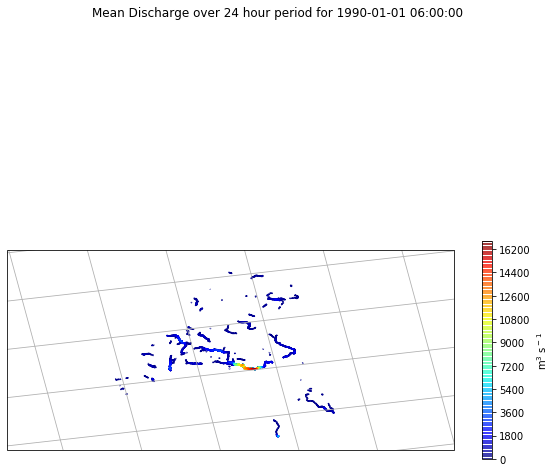

In [5]:
#%matplotlib notebook
import matplotlib.pyplot as plot
from mpl_toolkits.basemap import Basemap,cm
import numpy as np
import pandas as pd

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

globe=ccrs.Globe(ellipse='GRS80')
dis24 = ds.dis24.values[:, :]
lats = ds.latitude.values
lons = ds.longitude.values

#plt.gca
date=pd.Timestamp(ds.dis24.time.data)

plot.figure(str(date),figsize=(10,10))
projection=ccrs.LambertAzimuthalEqualArea(false_easting=4321000.0,false_northing=3210000.0,globe=globe)

plot.suptitle('Mean Discharge over 24 hour period for {s}'.format(s=date))
ax = plot.axes(projection=projection)#¢ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
#ax.add_feature(cfeature.RIVERS)


cmap=plot.cm.jet

#cs = plot.contour(lons, lats, dis24,100,vmin=0.0,vmax=16800,
#             transform=projection,cmap=cmap)
cbar = plot.colorbar(cs, shrink=0.4)
cbar.set_label('m$^3$ s$^-$$^1$')
ax.coastlines()
ax.gridlines()
ax.grid()


<IPython.core.display.Javascript object>


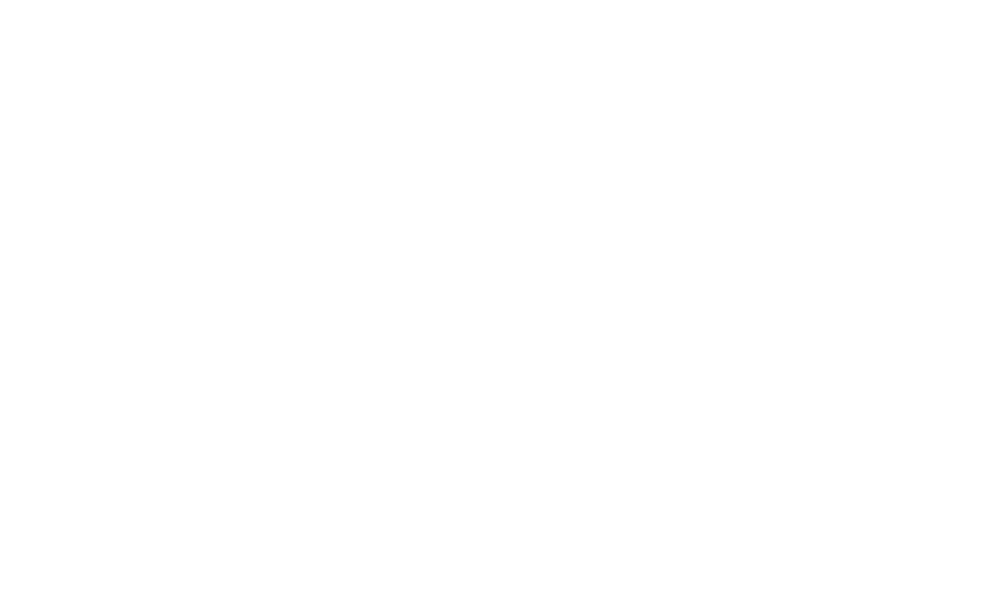

In [21]:
projection.proj4_params
projection

In [83]:
ds.dis24.max()

<xarray.DataArray 'dis24' ()>
array(16725.431640625, dtype=float32)

In [84]:
ds.dis24.min()

<xarray.DataArray 'dis24' ()>
array(0.00032997943344525993, dtype=float32)

In [129]:
ds.dis24.units

u'm**3 s**-1'